# {Breaking the Glass Firewall: Why Women Leave Tech Careers and Why Those Who Stay Don’t Advance}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

This project explores why women in technology are more likely to experience limited career progression and leave the industry at higher rates than their male counterparts. Understanding these differences in career trajectories between men and women is essential for promoting fairness in the workplace, reducing costs associated with turnover, and improving overall organizational success by retaining diverse talent.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do promotion and retention rates for women compare to those for men at similar career stages in the tech industry?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

**Hypothesis:**  
Women in technology experience lower promotion rates and leave the industry at higher rates compared to their male counterparts, even when they have similar qualifications and experience. This disparity is driven by factors that disproportionately affect women, including a higher likelihood of layoffs and gender-based discrimination. As a result, women are less likely to reach senior positions or remain in the tech industry long-term.


## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

**Data Sources**  
*HackerRank 2018 Developer Survey (Kaggle):* Published in 2018, based on 2017 survey responses.  
*Pew Research Center 2017 STEM Survey (zip file):* Based on 2017 responses.  
*NSF's National Center for Science and Engineering Statistics (Web-Scraped Tables):* Spans several years, ending in 2019, with specific data points from 2017 for comparison.
*From College to Jobs American Community Survey 2019 (U.S. Census Bureau xls files): Detailed information about jobs and salaries broken down by gender and level of education. 

**Relating the Data**  
- The datasets can be linked based on the shared timeframe (2017-2019) and gender as a common variable. 
- Gender will serve as a primary key or part of a composite key for linking. (Non-binary or unknown will be excluded from analysis.)
- Ages will be limited to the 25 - 64 range to match the American Community Survey data.


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

After joining the data from the various sources, I will generate specific visualizations to confirm or reject my hypothesis.

**Planned Visualizations to Support the Hypothesis:**
1. *Line Chart: Gender and Age Distribution in Technology*  
A line chart will display the number of employees in the technology sector, separated by gender and age groups. The x-axis will represent the age groups (e.g., 20-25, 26-30, etc.), and the y-axis will show the number of employees. This chart will highlight the drop-off point where women begin to leave the industry earlier than men, helping visualize retention issues.

2. *100% Stacked Column Chart: Men vs Women in Different Tech Roles*  
A 100% stacked column chart will show the proportional representation of men and women across different tech roles (e.g., Junior Developers, Senior Developers, Managers, Executives). Each column will represent a different role, and the stacked columns will show the gender distribution within that role as a percentage. This will provide a clear visual of how underrepresented women are in higher-level positions.

3. *Side-by-Side Column Chart: Workplace Concerns for Men vs Women*  
A side-by-side column chart will compare the key workplace concerns between men and women, such as issues with career progression, work-life balance, pay disparity, and workplace discrimination. Each concern will have two columns—one representing men and one representing women. This will make it easy to see where concerns overlap and where significant differences exist between the genders.

#### Package Imports

In [1]:
#import packages
import os # to create subfolder for data organization
from dotenv import load_dotenv
load_dotenv(override=True)

import opendatasets as od
import pandas as pd
import pyreadstat
import requests
import re # for string manipulation

import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
from urllib.request import urlretrieve
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from docx import Document


#### Import Dataset 1: HackerRank Developer Survey Published in 2018 that covered 2017 Questionnaire Responses

In [2]:
# import dataset from Kaggle using URL 
dataset_url = "https://www.kaggle.com/datasets/hackerrank/developer-survey-2018/data"
od.download(dataset_url, data_dir="./data")

Skipping, found downloaded files in "./data\developer-survey-2018" (use force=True to force download)


#### Convert dataset to a pandas dataframe and inspect data for Exploratory Data Analysis (EDA)

In [3]:
# Define the data directory
data_dir = './data/developer-survey-2018'

# Read each CSV file into its own DataFrame with meaningful names
country_code_df = pd.read_csv(os.path.join(data_dir, 'Country-Code-Mapping.csv'))
dev_survey_codebook_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Codebook.csv'))
dev_survey_numeric_mapping_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric-Mapping.csv'))
dev_survey_numeric_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric.csv'))
dev_survey_values_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Values.csv'))

# Display the first 5 records from each DataFrame
display(country_code_df.head(5))
display(dev_survey_codebook_df.head(5))
display(dev_survey_numeric_mapping_df.head(5))
display(dev_survey_numeric_df.head(5))
display(dev_survey_values_df.head(5))

C:\Users\Michelle\AppData\Local\Temp\ipykernel_46700\3349565919.py:8: DtypeWarning: Columns (10,19,137,138,250) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_survey_numeric_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric.csv'))
C:\Users\Michelle\AppData\Local\Temp\ipykernel_46700\3349565919.py:9: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_survey_values_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Values.csv'))


,Value,Label
0,4,Afghanistan
1,6,Albania
2,7,Algeria
3,8,American Samoa
4,9,Andorra


,Data Field,Survey Question,Notes
0,RespondentID,NaN,Respondent ID
1,StartDate,NaN,When did they start (date and time)
2,EndDate,NaN,When did they end (date and time)
3,CountryNumeric2,NaN,see Country-Code-Mapping.csv
4,q1AgeBeginCoding,At what age did you start coding,NaN


,Data Field,Value,Label
0,q1AgeBeginCoding,1,5 - 10 years old
1,q1AgeBeginCoding,2,11 - 15 years old
2,q1AgeBeginCoding,3,16 - 20 years old
3,q1AgeBeginCoding,4,21 - 25 years old
4,q1AgeBeginCoding,5,26 - 30 years old


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,...,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,...,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


#### Exploratory Data Analysis (EDA) Insights:
- The dataset is global, not local, meaning it does not precisely align with my other datasets.
    - Information from the country_code_df can be used to identify the country code and country name format so I can filter the other dataframes to only include the United States
- The datset includes NaN values in several fields including the country. 
    - Data will need to be explored further to determine the handling of NaN or #NULL! values
        - For example, if the NaN or NULL value is in gender or country, it cannot be determined using other methods and needs to be excluded from analysis. However,
        if the NaN or NULL is in the Job Level or Current Rank field, I may be able to populate those fields based on data from similar records.
- The Numeric and Values datasets have identical infomation, just in different formats.
    - In the Numeric dataset, all of the values are numerically coded.
    - In the Values dataset, all of the responses are in plain English.
- There are outliers in this data as far as what can be directly related to my other datasets and my hypothesis for the purpose of analysis.
    - Age ranges will need to be limited to match what is available in the datasets from other sources to make "apples to apples" comparisons.

In [4]:
# Find United States in the country_code_df to use for filtering purposes

# Rename columns
country_code_df.rename(columns={'Value': 'country_code', 'Label': 'country'}, inplace=True)

# Filter for the United States
us_country_code_df = country_code_df[country_code_df['country'] == 'United States']

# Display the resulting DataFrame
display(us_country_code_df)

,country_code,country
145,167,United States


#### Filtered dataframe to include only respondents in the United States

In [5]:
# Filter the DataFrame for United States questionnaire responses
us_dev_survey_numeric_df = dev_survey_numeric_df[dev_survey_numeric_df['CountryNumeric2'] == 167]

# Display the number of records
num_records_numeric = us_dev_survey_numeric_df.shape[0]
display(f"Number of records: {num_records_numeric}")

# Display the resulting DataFrame
display(us_dev_survey_numeric_df.head(5))

'Number of records: 4937'

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
5,6463843138,10/19/17 3:02,10/19/17 3:18,167.0,8,5,1,5,NaN,1,...,1,SoloLearn,1,1,NaN,2,NaN,#NULL!,NaN,2
6,6458326054,10/17/17 3:18,10/17/17 3:33,167.0,3,6,1,7,NaN,1,...,0,NaN,1,1,NaN,1,1.0,4,NaN,2
7,6467198274,10/21/17 8:55,10/21/17 9:06,167.0,3,3,1,5,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,1
24,6460870080,10/18/17 1:18,10/18/17 1:25,167.0,3,3,1,5,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
40,6479693460,10/26/17 7:10,10/26/17 7:20,167.0,2,6,1,5,NaN,1,...,1,IRC,1,1,NaN,2,NaN,#NULL!,NaN,2


#### Reduce dataframe columns to only those relevant to supporting or disproving my hypothesis
- fields such as date survey was completed and questions about the HackerRank survey were removed from dataframe for simplification

In [6]:
# List of relevant columns to keep
columns_to_keep = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole',
    'q12JobCritPrefTechStack', 'q12JobCritCompMission',
    'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
    'q12JobCritCompensation', 'q12JobCritProximity',
    'q12JobCritPerks', 'q12JobCritSmartPeopleTeam',
    'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems',
    'q12JobCritFundingandValuation', 'q12JobCritStability',
    'q12JobCritProfGrowth', 'q16HiringManager',
    'q17HirChaNoDiversCandidates', 'q20CandYearExp',
    'q20CandCompScienceDegree', 'q20CandCodingBootcamp',
    'q20CandSkillCert', 'q20CandHackerRankActivity',
    'q20CandOtherCodingCommAct', 'q20CandGithubPersProj',
    'q20CandOpenSourceContrib', 'q20CandHackathonPart',
    'q20CandPrevWorkExp', 'q20CandPrestigeDegree',
    'q20CandLinkInSkills', 'q20CandGithubPersProj2'
]

# Create a new DataFrame with only the selected columns
filtered_us_dev_survey_numeric_df = us_dev_survey_numeric_df[columns_to_keep]

# Display information about the DataFrame 
filtered_us_dev_survey_numeric_df.info()

# Display the resulting DataFrame
display(filtered_us_dev_survey_numeric_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 5 to 9892
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RespondentID                   4937 non-null   int64 
 1   q2Age                          4937 non-null   object
 2   q3Gender                       4937 non-null   object
 3   q10Industry                    4937 non-null   object
 4   q8JobLevel                     4937 non-null   int64 
 5   q9CurrentRole                  4937 non-null   object
 6   q12JobCritPrefTechStack        4937 non-null   int64 
 7   q12JobCritCompMission          4937 non-null   int64 
 8   q12JobCritCompCulture          4937 non-null   int64 
 9   q12JobCritWorkLifeBal          4937 non-null   int64 
 10  q12JobCritCompensation         4937 non-null   int64 
 11  q12JobCritProximity            4937 non-null   int64 
 12  q12JobCritPerks                4937 non-null   int64 
 13  q12JobCr

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
5,6463843138,5,1,14,0,0,0,0,1,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
6,6458326054,6,1,5,9,19,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7,6467198274,3,1,4,2,0,0,0,1,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
24,6460870080,3,1,0,1,18,0,0,0,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
40,6479693460,6,1,14,10,11,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#### Check for Duplicate Records
- Some records will be similar, but all records should have a unique RespondentID

In [7]:
# Check for duplicates in the RespondentID field
duplicates = filtered_us_dev_survey_numeric_df[filtered_us_dev_survey_numeric_df.duplicated('RespondentID', keep=False)]

# Count the number of duplicate RespondentIDs
num_duplicates = duplicates.shape[0]

# Display the duplicates if any
if num_duplicates > 0:
    print(f"Number of duplicate records found: {num_duplicates}")
    display(duplicates[['RespondentID']])
else:
    print("No duplicate records found in RespondentID.")

No duplicate records found in RespondentID.


#### Filter DataFrame to be Consistent with American Community Survey Parameters for Data Matching
- Remove ages under 25 years old (coded as q2Age: 1, 2, or 3)
- Remove ages over 64 years old (coded as q2Age: 8 or 9)
- Remove non-binary respondents (coded as q3Gender: 3)

In [8]:
# Summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_numeric_df['q2Age'].value_counts(dropna=False)
print("Summary of counts for each value in q2Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_numeric_df['q3Gender'].value_counts(dropna=False)
print("\nSummary of counts for each value in q3Gender:")
print(gender_summary)

Summary of counts for each value in q2Age:
q2Age
4         2067
3         1791
5          647
6          194
2          160
7           57
#NULL!      11
8            6
9            2
1            2
Name: count, dtype: int64

Summary of counts for each value in q3Gender:
q3Gender
1         3889
2         1000
3           35
#NULL!      13
Name: count, dtype: int64


In [9]:
# Remove records where q2Age is #NULL!, 1, 2, 3, 8, or 9
filtered_us_dev_survey_numeric_df = filtered_us_dev_survey_numeric_df[
    ~filtered_us_dev_survey_numeric_df['q2Age'].isin(['#NULL!', '1', '2', '3', '8', '9'])
]

# Remove records where q3Gender is #NULL! or 3
filtered_us_dev_survey_numeric_df = filtered_us_dev_survey_numeric_df[
    ~filtered_us_dev_survey_numeric_df['q3Gender'].isin(['#NULL!', '3'])
]

# Display the row count of the refined DataFrame
row_count_after_filtering = filtered_us_dev_survey_numeric_df.shape[0]
print(f"Row count after filtering: {row_count_after_filtering}")

# New summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_numeric_df['q2Age'].value_counts(dropna=False)
print("New summary of counts for each value in q2Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_numeric_df['q3Gender'].value_counts(dropna=False)
print("\nNew summary of counts for each value in q3Gender:")
print(gender_summary)

Row count after filtering: 2942
New summary of counts for each value in q2Age:
q2Age
4    2049
5     642
6     194
7      57
Name: count, dtype: int64

New summary of counts for each value in q3Gender:
q3Gender
1    2413
2     529
Name: count, dtype: int64


#### Separate Responses by Worker Responses and Hiring Manager Responses
- Used q16HiringManager response to determine role
- Chose specific response fields relevant to hypothesis such as age, gender, industry, job level, current role, and job qualities for worker dataframe
- Survey questions were ordered by if they applied to worker responses or hiring manager responses. For example, everything after q16HiringManager were
questions only shown/relevant to people who responded "Yes"

In [10]:
# Define columns for Worker Responses Numeric DataFrame
worker_columns_numeric = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole',
    'q12JobCritPrefTechStack', 'q12JobCritCompMission',
    'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
    'q12JobCritCompensation', 'q12JobCritProximity',
    'q12JobCritPerks', 'q12JobCritSmartPeopleTeam',
    'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems',
    'q12JobCritFundingandValuation', 'q12JobCritStability',
    'q12JobCritProfGrowth', 'q16HiringManager'
]

# Create Worker Responses Numeric DataFrame
worker_responses_numeric_df = filtered_us_dev_survey_numeric_df[
    filtered_us_dev_survey_numeric_df['q16HiringManager'] == 2  # Not a hiring manager
][worker_columns_numeric]

# Define columns for Hiring Manager Responses Numeric DataFrame
hiring_manager_columns_numeric = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole', 'q16HiringManager',
    'q17HirChaNoDiversCandidates', 'q20CandYearExp',
    'q20CandCompScienceDegree', 'q20CandCodingBootcamp',
    'q20CandSkillCert', 'q20CandHackerRankActivity',
    'q20CandOtherCodingCommAct', 'q20CandGithubPersProj',
    'q20CandOpenSourceContrib', 'q20CandHackathonPart',
    'q20CandPrevWorkExp', 'q20CandPrestigeDegree',
    'q20CandLinkInSkills', 'q20CandGithubPersProj2'
]

# Create Hiring Manager Responses Numeric DataFrame
hiring_manager_responses_numeric_df = filtered_us_dev_survey_numeric_df[
    filtered_us_dev_survey_numeric_df['q16HiringManager'] == 1  # Is a hiring manager
][hiring_manager_columns_numeric]

# Display the resulting Worker Responses Numeric DataFrame and info about the dataframe
print("Worker Responses Numeric DataFrame:")
display(worker_responses_numeric_df.info())
display(worker_responses_numeric_df.head(5))

# Display the resulting Hiring Manager Responses Numeric DataFrame and info about the dataframe
print("Hiring Manager Responses Numeric DataFrame:")
display(hiring_manager_responses_numeric_df.info())
display(hiring_manager_responses_numeric_df.head(5))


Worker Responses Numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1486 entries, 5 to 9889
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RespondentID                   1486 non-null   int64 
 1   q2Age                          1486 non-null   object
 2   q3Gender                       1486 non-null   object
 3   q10Industry                    1486 non-null   object
 4   q8JobLevel                     1486 non-null   int64 
 5   q9CurrentRole                  1486 non-null   object
 6   q12JobCritPrefTechStack        1486 non-null   int64 
 7   q12JobCritCompMission          1486 non-null   int64 
 8   q12JobCritCompCulture          1486 non-null   int64 
 9   q12JobCritWorkLifeBal          1486 non-null   int64 
 10  q12JobCritCompensation         1486 non-null   int64 
 11  q12JobCritProximity            1486 non-null   int64 
 12  q12JobCritPerks                

None

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q16HiringManager
5,6463843138,5,1,14,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,2
44,6464279786,5,1,14,6,3,0,0,0,1,1,0,0,1,0,0,0,0,0,2
48,6463324693,4,1,14,5,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2
72,6462833075,4,1,4,1,18,0,0,0,1,1,0,0,0,0,1,0,0,1,2
75,6463564885,4,1,14,4,9,0,0,0,0,1,0,1,1,0,0,0,0,1,2


Hiring Manager Responses Numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 6 to 9890
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   RespondentID                 1456 non-null   int64 
 1   q2Age                        1456 non-null   object
 2   q3Gender                     1456 non-null   object
 3   q10Industry                  1456 non-null   object
 4   q8JobLevel                   1456 non-null   int64 
 5   q9CurrentRole                1456 non-null   object
 6   q16HiringManager             1456 non-null   int64 
 7   q17HirChaNoDiversCandidates  1456 non-null   object
 8   q20CandYearExp               1456 non-null   object
 9   q20CandCompScienceDegree     1456 non-null   object
 10  q20CandCodingBootcamp        1456 non-null   object
 11  q20CandSkillCert             1456 non-null   object
 12  q20CandHackerRankActivity    1456 non-null   object

None

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q16HiringManager,q17HirChaNoDiversCandidates,q20CandYearExp,q20CandCompScienceDegree,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
6,6458326054,6,1,5,9,19,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
40,6479693460,6,1,14,10,11,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
42,6463550038,4,1,5,5,9,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
43,6480657500,4,1,11,6,11,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
47,6478832462,4,2,9,5,4,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0


#### Exploratory Data Analysis (EDA)
- The numeric dataframe should consist entirely of int64 data types, yet the majority have an "object" data type instead.
 - These datatypes will need to be converted for certain types of analysis like a correlation matrix.

In [11]:
# Convert all columns in Worker Responses Numeric DataFrame to int64
worker_responses_numeric_df = worker_responses_numeric_df.apply(pd.to_numeric, errors='coerce').astype('Int64')

# Convert all columns in Hiring Manager Responses Numeric DataFrame to int64
hiring_manager_responses_numeric_df = hiring_manager_responses_numeric_df.apply(pd.to_numeric, errors='coerce').astype('Int64')

# Display the resulting Worker Responses Numeric DataFrame and info about the dataframe
print("Worker Responses Numeric DataFrame:")
display(worker_responses_numeric_df.info())
display(worker_responses_numeric_df.head(5))

# Display the resulting Hiring Manager Responses Numeric DataFrame and info about the dataframe
print("Hiring Manager Responses Numeric DataFrame:")
display(hiring_manager_responses_numeric_df.info())
display(hiring_manager_responses_numeric_df.head(5))

Worker Responses Numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1486 entries, 5 to 9889
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   RespondentID                   1486 non-null   Int64
 1   q2Age                          1486 non-null   Int64
 2   q3Gender                       1486 non-null   Int64
 3   q10Industry                    1468 non-null   Int64
 4   q8JobLevel                     1486 non-null   Int64
 5   q9CurrentRole                  1486 non-null   Int64
 6   q12JobCritPrefTechStack        1486 non-null   Int64
 7   q12JobCritCompMission          1486 non-null   Int64
 8   q12JobCritCompCulture          1486 non-null   Int64
 9   q12JobCritWorkLifeBal          1486 non-null   Int64
 10  q12JobCritCompensation         1486 non-null   Int64
 11  q12JobCritProximity            1486 non-null   Int64
 12  q12JobCritPerks                1486 non-null 

None

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q16HiringManager
5,6463843138,5,1,14,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,2
44,6464279786,5,1,14,6,3,0,0,0,1,1,0,0,1,0,0,0,0,0,2
48,6463324693,4,1,14,5,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2
72,6462833075,4,1,4,1,18,0,0,0,1,1,0,0,0,0,1,0,0,1,2
75,6463564885,4,1,14,4,9,0,0,0,0,1,0,1,1,0,0,0,0,1,2


Hiring Manager Responses Numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 6 to 9890
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   RespondentID                 1456 non-null   Int64
 1   q2Age                        1456 non-null   Int64
 2   q3Gender                     1456 non-null   Int64
 3   q10Industry                  1454 non-null   Int64
 4   q8JobLevel                   1456 non-null   Int64
 5   q9CurrentRole                1456 non-null   Int64
 6   q16HiringManager             1456 non-null   Int64
 7   q17HirChaNoDiversCandidates  1456 non-null   Int64
 8   q20CandYearExp               1456 non-null   Int64
 9   q20CandCompScienceDegree     1456 non-null   Int64
 10  q20CandCodingBootcamp        1456 non-null   Int64
 11  q20CandSkillCert             1456 non-null   Int64
 12  q20CandHackerRankActivity    1456 non-null   Int64
 13  q20CandOt

None

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q16HiringManager,q17HirChaNoDiversCandidates,q20CandYearExp,q20CandCompScienceDegree,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
6,6458326054,6,1,5,9,19,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
40,6479693460,6,1,14,10,11,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
42,6463550038,4,1,5,5,9,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
43,6480657500,4,1,11,6,11,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
47,6478832462,4,2,9,5,4,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0


#### Data Visualization using Seaborn Correlation Matrix
**Purpose:** Examine the relationships between key demographic and job criteria variables in the Worker Responses Numeric DataFrame.

**Insights:**
- **Age and Job Level Correlation:** The matrix reveals a moderate correlation between *Age* and *Job Level*, indicating that older workers are more likely to hold higher job levels, reflecting common career progression trends.
- **Weak Correlations:** Most other variables show minimal correlation, suggesting that individual factors like *job preferences* or *industry* alone do not strongly predict other attributes, making them less effective for simple statistical analysis--at least in this specific dataset.


**INSIGHTS UPDATE:**
- *After further filtering to remove ages under 25 and over 64, the moderate correlation between age and job level that was seen in the earlier version is no longer apparent.*

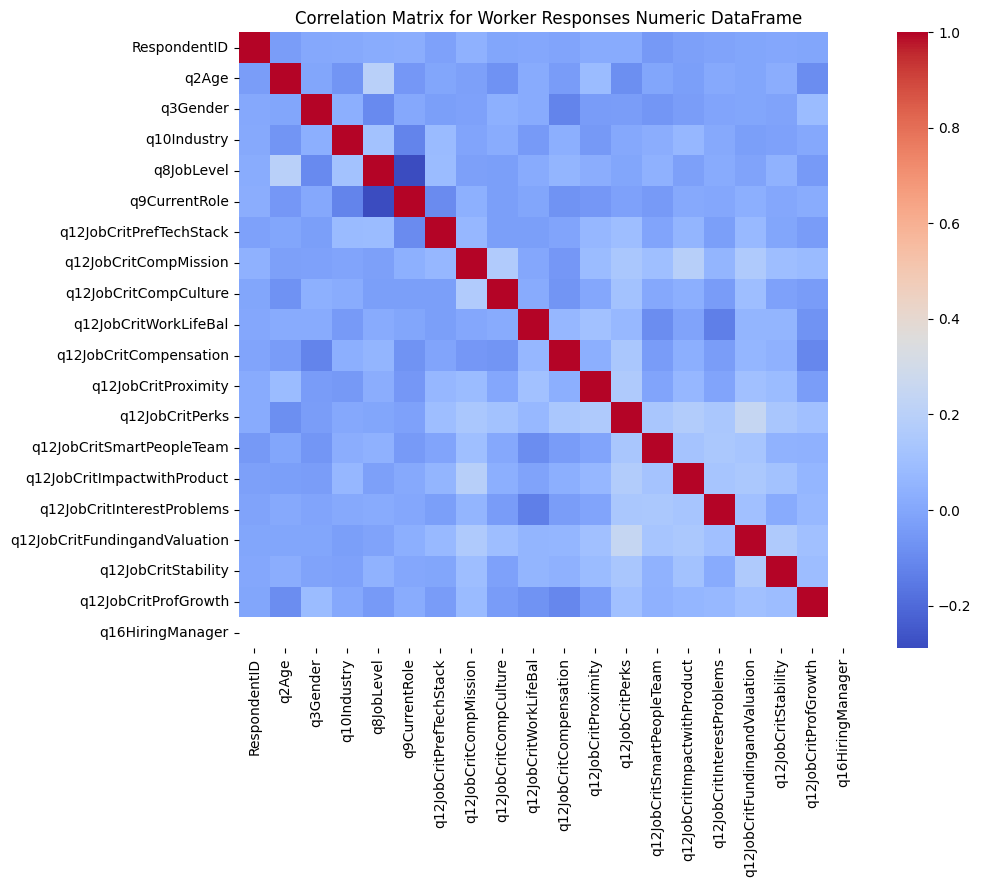

In [12]:
# Filter out rows with any missing values for the correlation calculation
worker_responses_filtered = worker_responses_numeric_df.dropna()

# Compute the correlation matrix on the filtered data
worker_correlation_matrix = worker_responses_filtered.corr()

# Plot the correlation heatmap for Worker Responses
plt.figure(figsize=(10, 8))
sns.heatmap(worker_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Worker Responses Numeric DataFrame")
plt.show()


## Repeat filtering logic from numeric version of data on the values version of the data
- Both datasets contain the same records, but one has numeric codes for all responses and the other has plain language values for all responses 
so the same logic can be used for both dataframes.

In [13]:
# Filter the DataFrame for CountryNumeric2 = "United States"
us_dev_survey_values_df = dev_survey_values_df[dev_survey_values_df['CountryNumeric2'] == "United States"]

# Display the number of records
num_records_values = us_dev_survey_values_df.shape[0]
display(f"Number of records: {num_records_values}")

# Display the resulting DataFrame
display(us_dev_survey_values_df.head(5))

'Number of records: 4937'

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
5,6463843138,10/19/17 3:02,10/19/17 3:18,United States,41 - 50 years old,35 - 44 years old,Male,College graduate,NaN,Computer Science,...,Other (please specify),SoloLearn,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
6,6458326054,10/17/17 3:18,10/17/17 3:33,United States,16 - 20 years old,45 - 54 years old,Male,"Post graduate degree (Masters, PhD)",NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,Yes,1.0,2 to 4 hours,NaN,Queue
7,6467198274,10/21/17 8:55,10/21/17 9:06,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Set
24,6460870080,10/18/17 1:18,10/18/17 1:25,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
40,6479693460,10/26/17 7:10,10/26/17 7:20,United States,11 - 15 years old,45 - 54 years old,Male,College graduate,NaN,Computer Science,...,Other (please specify),IRC,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue


In [14]:
# Reduce dataframe columns to only those relevant to supporting or disproving my hypothesis

# List of relevant columns to keep
columns_to_keep = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole',
    'q12JobCritPrefTechStack', 'q12JobCritCompMission',
    'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
    'q12JobCritCompensation', 'q12JobCritProximity',
    'q12JobCritPerks', 'q12JobCritSmartPeopleTeam',
    'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems',
    'q12JobCritFundingandValuation', 'q12JobCritStability',
    'q12JobCritProfGrowth', 'q16HiringManager',
    'q17HirChaNoDiversCandidates', 'q20CandYearExp',
    'q20CandCompScienceDegree', 'q20CandCodingBootcamp',
    'q20CandSkillCert', 'q20CandHackerRankActivity',
    'q20CandOtherCodingCommAct', 'q20CandGithubPersProj',
    'q20CandOpenSourceContrib', 'q20CandHackathonPart',
    'q20CandPrevWorkExp', 'q20CandPrestigeDegree',
    'q20CandLinkInSkills', 'q20CandGithubPersProj2'
]

# Create a new DataFrame with only the selected columns
filtered_us_dev_survey_values_df = us_dev_survey_values_df[columns_to_keep]

# Display information about the DataFrame 
filtered_us_dev_survey_values_df.info()

# Display the resulting DataFrame
display(filtered_us_dev_survey_values_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 5 to 9892
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RespondentID                   4937 non-null   int64 
 1   q2Age                          4937 non-null   object
 2   q3Gender                       4937 non-null   object
 3   q10Industry                    4416 non-null   object
 4   q8JobLevel                     4661 non-null   object
 5   q9CurrentRole                  4666 non-null   object
 6   q12JobCritPrefTechStack        971 non-null    object
 7   q12JobCritCompMission          743 non-null    object
 8   q12JobCritCompCulture          2095 non-null   object
 9   q12JobCritWorkLifeBal          2688 non-null   object
 10  q12JobCritCompensation         2342 non-null   object
 11  q12JobCritProximity            860 non-null    object
 12  q12JobCritPerks                488 non-null    object
 13  q12JobCr

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
5,6463843138,35 - 44 years old,Male,Technology,NaN,NaN,NaN,NaN,Company culture,Good work/life balance,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
6,6458326054,45 - 54 years old,Male,Financial Services,Director / VP of Engineering,Unemployed,NaN,Company mission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,Prestige of degree,NaN,NaN
7,6467198274,18 - 24 years old,Male,Education,New grad,NaN,NaN,NaN,Company culture,NaN,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
24,6460870080,18 - 24 years old,Male,NaN,Student,Student,NaN,NaN,NaN,Good work/life balance,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
40,6479693460,45 - 54 years old,Male,Technology,Founder / CEO / CTO,Software Architect,Preferred tech stack,NaN,Company culture,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,NaN,NaN,Github or personal projects


#### Clean the values dataframe
- Removed records where gender is missing because they cannot be used to prove/disprove the hypothesis.
- Filtered out records where gender is non-binary to match the parameters of the US Census Burea's American Community Survey.
- Filtered out records where respondents were under 25 or over 64 to match the parameters of the US Census Bureau's American Community Survey.
- Filtered out records where the age is null because both age and gender are necessary to determine job level comparisons.


In [23]:
# Create a copy to work on and avoid SettingWithCopyWarning
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df.copy()

# Drop records where Gender is null
filtered_us_dev_survey_values_df.dropna(subset=['q3Gender'], inplace=True)

# Drop records where Gender is '#NULL!' or 'Non-Binary'
filtered_us_dev_survey_values_df.drop(
    filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['q3Gender'].isin(['#NULL!', 'Non-Binary'])].index,
    inplace=True
)

# Filter out respondents who are under 25 or over 64 
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    ~filtered_us_dev_survey_values_df['q2Age'].isin(["Under 12 years old", "12 - 18 years old", "18 - 24 years old", "65 - 74 years old", "75 years or older"])
]

# Filter out rows where Age is '#NULL!'
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    filtered_us_dev_survey_values_df['q2Age'] != '#NULL!'
]

# Display how many rows remain
print(f"Remaining records after cleaning (SHOULD BE 2942 IF CORRECT): {filtered_us_dev_survey_values_df.shape[0]}")

# New summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_values_df['q2Age'].value_counts(dropna=False)
print("New summary of counts for each value in Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_values_df['q3Gender'].value_counts(dropna=False)
print("\nNew summary of counts for each value in Gender:")
print(gender_summary)

Remaining records after cleaning (SHOULD BE 2942 IF CORRECT): 2942
New summary of counts for each value in Age:
q2Age
25 - 34 years old    2049
35 - 44 years old     642
45 - 54 years old     194
55 - 64 years old      57
Name: count, dtype: int64

New summary of counts for each value in Gender:
q3Gender
Male      2413
Female     529
Name: count, dtype: int64


#### Clean the values dataframe
- Rename columns
- Filtered out records where current role or job level is student because they are not relevant to my hypothesis.
- Filtered out records where both the Job Level and Current Role were NaN because there is no way to determine values for the field if both are blank.


In [27]:
# Rename columns
filtered_us_dev_survey_values_df.rename(columns={
    'q2Age': 'Age',
    'q3Gender': 'Gender',
    'q10Industry': 'Industry',
    'q8JobLevel': 'Job Level',
    'q9CurrentRole': 'Current Role'
}, inplace=True)

# Filter out rows where Current Role or Job Level is "Student"
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    (filtered_us_dev_survey_values_df['Current Role'] != 'Student') & 
    (filtered_us_dev_survey_values_df['Job Level'] != 'Student')
]

# Filter out rows where both Job Level and Current Role are NaN
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    ~ (filtered_us_dev_survey_values_df['Job Level'].isna() & filtered_us_dev_survey_values_df['Current Role'].isna())
]

# Display how many rows remain
print(f"Remaining responses after cleaning: {filtered_us_dev_survey_values_df.shape[0]}")


Remaining responses after cleaning: 2505


#### Data Visualization using Matplotlib Bar Graph
**Purpose:** Perform a preliminary analysis of the HackerRank Dataset breakdown by age and gender
**Insights:**
- **Age Group Representation**: The graph reveals how many workers fall into each age group, highlighting the most common age demographics within the dataset.
- **Gender Distribution**: By comparing the heights of the bars for different genders, we can see which age groups have higher counts of male and female workers. This highlights trends in workforce composition.
- **Demographic Changes:** The visualization aims to assess whether there is a change in demographics proportionally from age group to age group, providing insights into how representation shifts across different stages of workforce experience.

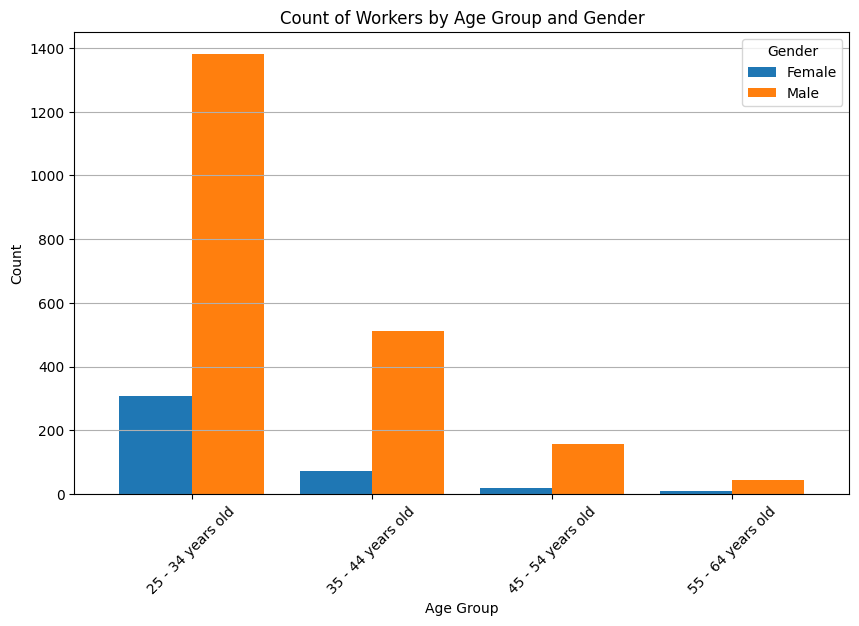

In [26]:
# Group the data by Age Group and Gender, and count occurrences
age_gender_counts = filtered_us_dev_survey_values_df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each gender as a separate bar
age_gender_counts.plot(kind='bar', width=0.8, ax=plt.gca())

# Customize the plot
plt.title('Count of Workers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y')  # Add horizontal grid lines for better readability

plt.show()

#### Additional Exploratory Data Analyis (EDA) for Data Relevance
- Determine if records where Job Level = New grad have current roles other than "unemployed" to decide if they should be included in analysis.
- Look for records where the Job Level is NaN but the Current Role is not NaN.
    - These records can be used with machine learning classification to populate missing values.

In [ ]:
# Review dataset to determine what data is relevant

# Check Current Role for Job Level "New grad"
new_grad_roles = worker_responses_values_df[worker_responses_values_df['Job Level'] == 'New grad'] \
    .groupby('Current Role').size().reset_index(name='Counts')

# Filter for rows where Job Level is NaN and Current Role is not NaN
nan_job_level_current_role_df = worker_responses_values_df[worker_responses_values_df['Job Level'].isna() & 
    worker_responses_values_df['Current Role'].notna()]

# Display results
print("Current Roles for Job Level 'New grad':")
display(new_grad_roles)

print("Rows where Job Level is NaN and Current Role is not NaN:")
display(nan_job_level_current_role_df[['Job Level', 'Current Role']])


Current Roles for Job Level 'New grad':


,Current Role,Counts
0,Back-end Developer,7
1,Data Analyst,4
2,Data Engineer,1
3,Data Scientist,7
4,Database Administrator,1
5,Development Operations Engineer,3
6,Front-end Developer,3
7,Full-stack Developer,11
8,Mobile Developer,2
9,Platform Engineer,1


Rows where Job Level is NaN and Current Role is not NaN:


,Job Level,Current Role
110,NaN,Software Test Engineer
513,NaN,Full-stack Developer
931,NaN,Data Scientist
1142,NaN,Front-end Developer
1433,NaN,Front-end Developer
...,...,...
6151,NaN,Software Test Engineer
6169,NaN,Data Analyst
6174,NaN,Software Engineer
6202,NaN,Data Analyst


#### More Exploratory Data Analysis (EDA)
- Check if there is a dominant job level associated with the Current Role field that could be used to populate empty fields.

In [20]:
# Group by Current Role and Job Level, and count occurrences
role_level_counts = worker_responses_values_df.groupby(['Current Role', 'Job Level']).size().reset_index(name='Counts')

# Set the option to display all rows for this code cell only
with pd.option_context('display.max_rows', None):
    display(role_level_counts)


,Current Role,Job Level,Counts
0,Back-end Developer,Architect,1
1,Back-end Developer,Freelancer,1
2,Back-end Developer,Level 1 developer (junior),47
3,Back-end Developer,New grad,7
4,Back-end Developer,Principal engineer,2
5,Back-end Developer,Senior developer,54
6,Data Analyst,Freelancer,1
7,Data Analyst,Level 1 developer (junior),16
8,Data Analyst,New grad,4
9,Data Analyst,Senior developer,3


#### Data Visualization using Seaborn Box Plot
**Purpose:** Demonstrate how gender may impact job levels within specific career roles, in this case, "Software Test Engineer."

**Insights:**
- **Gender-based Distribution:** The box plot illustrates the distribution of job levels across genders within the "Software Test Engineer" role. Males occupy both junior and senior developer positions, with a whisker extending into the new grad category and an outlier at the principal engineer level. In contrast, females are represented solely at the level 1 developer position, with an outlier in the senior developer category, indicating a lack of representation at higher job levels.
- **Outliers and Range:** The presence of males in both junior and senior roles suggests a broader range of career progression, while females are limited to entry-level roles, with an exception at the senior developer level. This disparity points to potential barriers to advancement for female employees in this role.
- **Rationale for Machine Learning Approach:** Given the distinct differences in job level distributions, simple statistical measures like the mean or median would be insufficient for accurately predicting job levels based on gender. Employing a KNN classifier could more effectively capture the nuanced relationships between demographic variables and job levels.

This visualization highlights the relevance of employing a machine learning approach that can adapt to demographic differences, rather than relying on single-point estimates like the mean or median for classification.

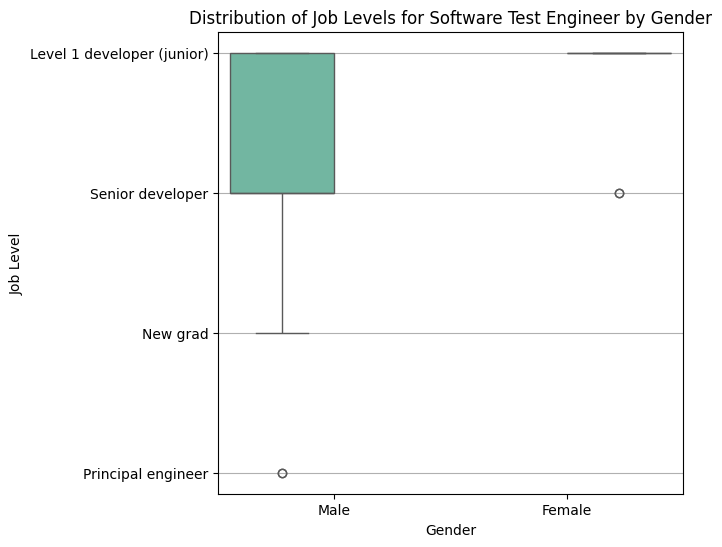

In [21]:
# Filter for a specific current role 
specific_role = "Software Test Engineer"
role_data = worker_responses_values_df[worker_responses_values_df['Current Role'] == specific_role].copy()

# Create a horizontal box plot with gaps between the boxes
plt.figure(figsize=(6, 6))
sns.boxplot(data=role_data, y='Job Level', x='Gender', hue='Gender', palette='Set2', width=0.9, dodge=True)
plt.title(f'Distribution of Job Levels for {specific_role} by Gender')
plt.ylabel('Job Level')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.show()

#### Use Machine Learning to Populate NaN Job Level Records

In [22]:
# Use KNearestNeighbors to determine most likely Job Level based on age, gender, and current role

# Prepare the DataFrame for KNN training
train_df = worker_responses_values_df[worker_responses_values_df['Job Level'].notna()].copy()

# Create numeric mappings for Age and Gender for training
train_df.loc[:, 'Age Numeric'] = train_df['Age'].map(age_mapping)
train_df.loc[:, 'Gender Numeric'] = train_df['Gender'].map(gender_mapping)

# Encode Current Role using Label Encoding
le_role = LabelEncoder()
train_df.loc[:, 'Current Role Encoded'] = le_role.fit_transform(train_df['Current Role'])

# Prepare the feature set and target variable for training
X_train = train_df[['Age Numeric', 'Gender Numeric', 'Current Role Encoded']]
y_train = train_df['Job Level']

# Filter the rows with NaN Job Level for predictions
predict_df = worker_responses_values_df[worker_responses_values_df['Job Level'].isna()].copy()
predict_df.loc[:, 'Age Numeric'] = predict_df['Age'].map(age_mapping)
predict_df.loc[:, 'Gender Numeric'] = predict_df['Gender'].map(gender_mapping)
predict_df.loc[:, 'Current Role Encoded'] = le_role.transform(predict_df['Current Role'])

# Create the feature set for predictions
X_predict = predict_df[['Age Numeric', 'Gender Numeric', 'Current Role Encoded']]

# Initialize and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict NaN Job Levels
predicted_levels = knn.predict(X_predict)

# Display the predictions before overwriting the original DataFrame
predict_df['Predicted Job Level'] = predicted_levels
print("Predicted Job Levels for records with NaN Job Level:")
display(predict_df[['Current Role', 'Predicted Job Level']])

NameError: name 'age_mapping' is not defined

In [ ]:
#Update Job Level field with predictions and verify changes

# Update the Job Level in the original DataFrame where it was NaN
worker_responses_values_df.loc[worker_responses_values_df['Job Level'].isna(), 'Job Level'] = predicted_levels

# Verify that no records remain with NaN Job Level
remaining_nan_job_levels = worker_responses_values_df['Job Level'].isna().sum()
print(f"Number of records with NaN Job Level after updating: {remaining_nan_job_levels}")

# Display the cleaned DataFrame
display(worker_responses_values_df.head(5))

Number of records with NaN Job Level after updating: 0


,RespondentID,Age,Gender,Industry,Job Level,Current Role,q16HiringManager,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth
7,6467198274,18 - 24 years old,Male,Education,New grad,NaN,No,NaN,NaN,Company culture,NaN,NaN,NaN,NaN,Smart people / team,NaN,NaN,NaN,NaN,Professional growth and learning
44,6464279786,35 - 44 years old,Male,Technology,Principal engineer,Back-end Developer,No,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,NaN,NaN,NaN,NaN
48,6463324693,25 - 34 years old,Male,Technology,Senior developer,NaN,No,NaN,NaN,NaN,NaN,Compensation,NaN,Perks,NaN,NaN,NaN,NaN,NaN,Professional growth and learning
75,6463564885,25 - 34 years old,Male,Technology,Level 1 developer (junior),Software Engineer,No,NaN,NaN,NaN,NaN,Compensation,NaN,Perks,Smart people / team,NaN,NaN,NaN,NaN,Professional growth and learning
102,6464022754,25 - 34 years old,Male,Media,Level 1 developer (junior),Back-end Developer,No,NaN,NaN,Company culture,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Import Dataset 2: 2017 Pew Research Center STEM Survey

In [ ]:
# import zip file from Pew Research
file_handle, _ = urlretrieve("https://www.pewresearch.org/wp-content/uploads/sites/20/2019/04/2017-Pew-Research-Center-STEM-survey.zip")
zipfile = ZipFile(file_handle, "r")
zipfile.extractall("./data")
zipfile.close()

#### Examine contents of .sav file

In [ ]:
file_path = 'data/materials for public release/2017 Pew Research Center STEM survey.sav'

# Read the .sav file into a DataFrame
df, meta = pyreadstat.read_sav(file_path)

# Display basic information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Columns: 220 entries, CaseID to RECONC_col
dtypes: float64(220)
memory usage: 8.2 MB
None
   CaseID  weight  WORK_1  WORK_2  WORK_3  WORK_4  EMPLOYED  FULLPART  \
0     3.0  0.0707     1.0     2.0     2.0     2.0       1.0       1.0   
1     4.0  0.3938     1.0     2.0     2.0     2.0       1.0       1.0   
2     5.0  1.7321     2.0     1.0     2.0     2.0       1.0       2.0   
3     6.0  0.1478     1.0     2.0     2.0     1.0       1.0       1.0   
4     7.0  1.5842     2.0     2.0     2.0     1.0       1.0       2.0   

   SELFEMPLOYED  OCCUPATION_col  ...  SCICOUR2_t  MATHCOUR2_t  PPT017_t  \
0           2.0             3.0  ...         1.0          1.0       0.0   
1           2.0             5.0  ...        12.0          8.0       2.0   
2           2.0            19.0  ...        98.0         98.0       0.0   
3           1.0             9.0  ...        15.0          6.0       0.0   
4           1.0       

#### Read the .docx file
- Read the Pew Research Center files associated with the .sav file and convert them into .txt files to understand the codes used.

In [ ]:
# Load the Questionnaire document
questionnaire_path = './data/materials for public release/Questionnaire - 2017 Pew Research Center STEM Survey.docx'
questionnaire_doc = Document(questionnaire_path)

# Extract text from the Questionnaire document
prc_questions = []  
for paragraph in questionnaire_doc.paragraphs:
    prc_questions.append(paragraph.text)

# Join all paragraphs into a single string for the questionnaire
prc_questions_text = "\n".join(prc_questions)

# Define the path for saving the questionnaire .txt file
questionnaire_txt_file_path = './data/materials for public release/prc_questionnaire.txt'

# Save the full text to a .txt file
with open(questionnaire_txt_file_path, 'w', encoding='utf-8') as f:
    f.write(prc_questions_text)

print(f"The questionnaire has been extracted and saved to '{questionnaire_txt_file_path}'.")

# Preview the first few lines of the extracted questionnaire
print("Preview of the extracted questionnaire:")
print(prc_questions_text[:400])

# Load the Codebook document
codebook_path = './data/materials for public release/Codebook - 2017 Pew Research Center STEM Survey.docx'
codebook_doc = Document(codebook_path)

# Extract text from the Codebook document
prc_codebook = []  
for paragraph in codebook_doc.paragraphs:
    prc_codebook.append(paragraph.text)

# Join all paragraphs into a single string for the codebook
prc_codebook_text = "\n".join(prc_codebook)

# Define the path for saving the codebook .txt file
codebook_txt_file_path = './data/materials for public release/prc_codebook.txt'

# Save the full text to a .txt file
with open(codebook_txt_file_path, 'w', encoding='utf-8') as f:
    f.write(prc_codebook_text)

print(f"The codebook has been extracted and saved to '{codebook_txt_file_path}'.")

# Preview the first few lines of the extracted codebook
print("Preview of the extracted codebook:")
print(prc_codebook_text[:400])

The questionnaire has been extracted and saved to './data/materials for public release/prc_questionnaire.txt'.
Preview of the extracted questionnaire:
PEW RESEARCH CENTER
2017 STEM QUESTIONNAIRE
JULY 11-AUGUST 10, 2017


ASK ALL:
WORK	Do any of the following currently describe you?  

1. Employed full time (35 hours or more per week) for pay with an organization or company
2. Employed part time (less than 35 hours per week) for pay with an organization or company
3. Self-employed full time (35 hours or more per week)
4. Self-employed part time (
The codebook has been extracted and saved to './data/materials for public release/prc_codebook.txt'.
Preview of the extracted codebook:
BACKGROUND AND CODEBOOK
PEW RESEARCH CENTER
2017 STEM SURVEY

Background
This document provides background information and codebook details for those wishing to analyze the data from a 2017 Pew Research Center survey of U.S. adults about careers and education in science, technology, engineering and math (STEM).

#### Display All Column Names in Dataframe
- Reading the column names with the new context of the Questionnaire and Codebook file will help to determine which columns are needed for analysis

In [ ]:
# Display all column names in the DataFrame
print("Column names in the Pew Research dataset:")
for col in df.columns:
    print(col)

Column names in the Pew Research dataset:
CaseID
weight
WORK_1
WORK_2
WORK_3
WORK_4
EMPLOYED
FULLPART
SELFEMPLOYED
OCCUPATION_col
INDUSTRY_col
TEACHSTEM
WORKTYPE_FINAL
SCH2a
SCH2b
SCH3a
SCH3b
SCH3c
SCH3d
SCH4
SCH5a
SCH5b
SCH5c
SCH6a
SCH6b
SCH6c
SCH6d
SCH6e
SCH6f
SCH6g
SCH6h
SCH7
SCH8a
SCH8b
SCH9a
SCH9b
SCH10_flag
SCH10A_1
SCH10A_2
SCH10A_3
SCH10A_4
SCH10A_5
SCH10A_6
SCH10A_Refused
SCH10B_1
SCH10B_2
SCH10B_3
SCH10B_4
SCH10B_5
SCH10B_6
SCH10B_Refused
JOBVALU1_1
JOBVALU1_2
JOBVALU1_3
JOBVALU1_4
JOBVALU1_5
JOBVALU1_6
JOBVALU1_7
JOBVALU1_8
JOBVALU1_Refused
JOBVALU2
AHEADa
AHEADb
AHEADc
AHEADd
AHEADe
AHEADf
AHEADg
TALENT
PROVE
RESPECTA
RESPECTB
FAMSTEM1
FAMSTEM2_1
FAMSTEM2_2
FAMSTEM2_Refused
INTEREST1
STEMJOBa
STEMJOBb
STEMJOBc
STEMJOBd
STEMJOBe
STEMJOBf
STEMJOBg
STEMJOBh
DOV_FORM
REASON1a
REASON1b
REASON1c
REASON1d
REASON1e
REASON1f
REASON1g
REASON2a
REASON2b
REASON2c
REASON2d
REASON2e
REASON2f
REASON2g
TECH1
TECH2
TECH3
TECH4
TECH5
TECH6
GEND1
GEND2
GEND3
GEND4
GEND5
GEND6_a
GEND6_b
GEND6_

#### Convert CaseID columns from float to int64

In [ ]:
# Convert 'CaseID' to int64
df['CaseID'] = df['CaseID'].astype('int64')

# Confirm the change
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
CaseID          int64
weight        float64
WORK_1        float64
WORK_2        float64
WORK_3        float64
               ...   
EDUC4CAT      float64
RACE_col      float64
RECONA_col    float64
RECONB_col    float64
RECONC_col    float64
Length: 220, dtype: object


#### Exploratory Data Analysis (EDA)
- Search for null values or refused responses in fields required for analysis.

In [ ]:
# Summary of counts for each value in WORK_1
employed_full_time = df['WORK_1'].value_counts(dropna=False)
print("Summary of counts for each value in WORK_1:")
print(employed_full_time)

# Summary of counts for each value in WORK_2
employed_part_time = df['WORK_2'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_2:")
print(employed_part_time)

# Summary of counts for each value in WORK_3
self_employed_full_time = df['WORK_3'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_3:")
print(self_employed_full_time)

# Summary of counts for each value in WORK_4
self_employed_part_time = df['WORK_4'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_4:")
print(self_employed_part_time)

# Summary of counts for each value in EMPLOYED
employment_status = df['EMPLOYED'].value_counts(dropna=False)
print("\nSummary of counts for each value in EMPLOYED:")
print(employment_status)

# Summary of counts for each value in FULLPART
employment_full_part = df['FULLPART'].value_counts(dropna=False)
print("\nSummary of counts for each value in FULLPART:")
print(employment_full_part)

# Summary of counts for each value in SELFEMPLOYED
self_employment = df['SELFEMPLOYED'].value_counts(dropna=False)
print("\nSummary of counts for each value in SELFEMPLOYED:")
print(self_employment)

# Summary of counts for each value in ppagecat
prc_age = df['ppagecat'].value_counts(dropna=False)
print("\nSummary of counts for each value in ppagecat:")
print(prc_age)

# Summary of counts for each value in PPGENDER
prc_gender = df['PPGENDER'].value_counts(dropna=False)
print("\nSummary of counts for each value in PPGENDER:")
print(prc_gender)

Summary of counts for each value in WORK_1:
WORK_1
1.0    3504
2.0    1407
9.0       3
Name: count, dtype: int64

Summary of counts for each value in WORK_2:
WORK_2
2.0    3984
1.0     915
9.0      15
Name: count, dtype: int64

Summary of counts for each value in WORK_3:
WORK_3
2.0    4591
1.0     313
9.0      10
Name: count, dtype: int64

Summary of counts for each value in WORK_4:
WORK_4
2.0    4432
1.0     473
9.0       9
Name: count, dtype: int64

Summary of counts for each value in EMPLOYED:
EMPLOYED
1.0    4702
2.0     212
Name: count, dtype: int64

Summary of counts for each value in FULLPART:
FULLPART
1.0    3743
2.0     958
3.0     212
9.0       1
Name: count, dtype: int64

Summary of counts for each value in SELFEMPLOYED:
SELFEMPLOYED
2.0    3937
1.0     756
3.0     212
9.0       9
Name: count, dtype: int64

Summary of counts for each value in ppagecat:
ppagecat
5.0    1285
4.0    1079
2.0     905
3.0     900
6.0     461
1.0     187
7.0      97
Name: count, dtype: int64

Summ

In [ ]:
# Convert specified columns to int64
columns_to_convert = [
    'WORK_1', 'WORK_2', 'WORK_3', 'WORK_4', 
    'EMPLOYED', 'FULLPART', 'SELFEMPLOYED'
]

# Convert to int64
for column in columns_to_convert:
    df[column] = df[column].astype('int64')

# Drop records with 9 for WORK_1, WORK_2, WORK_3, WORK_4, EMPLOYED, FULLPART, SELFEMPLOYED
df = df[~df[columns_to_convert].isin([9]).any(axis=1)]

# For ppagecat, drop 1, 6, and 7
df = df[~df['ppagecat'].isin([1, 6, 7])]

# Confirming the changes
print(f"Remaining records after filtering: {df.shape[0]}")
print("\nUpdated DataFrame info:")
print(df.info())


Remaining records after filtering: 4155

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 4155 entries, 0 to 4913
Columns: 220 entries, CaseID to RECONC_col
dtypes: float64(212), int64(8)
memory usage: 7.0 MB
None


#### Refine DataFrame for Pew Research Center STEM Survey
- Eliminate fields not needed for hypothesis
- Begin renaming fields

In [ ]:
# List of columns to exclude
columns_to_exclude = [
    'SCH2a', 'SCH2b', 'SCH3a', 'SCH3b', 'SCH3c', 'SCH3d',
    'SCH4', 'SCH5a', 'SCH5b', 'SCH5c', 'SCH6a', 'SCH6b',
    'SCH6c', 'SCH6d', 'SCH6e', 'SCH6f', 'SCH6g', 'SCH6h',
    'SCH7', 'SCH8a', 'SCH8b', 'SCH9a', 'SCH9b', 'SCH10_flag',
    'SCH10A_1', 'SCH10A_2', 'SCH10A_3', 'SCH10A_4', 'SCH10A_5',
    'SCH10A_6', 'SCH10A_Refused', 'SCH10B_1', 'SCH10B_2',
    'SCH10B_3', 'SCH10B_4', 'SCH10B_5', 'SCH10B_6', 'SCH10B_Refused',
    'STEMJOBa', 'STEMJOBb', 'STEMJOBc', 'STEMJOBd', 'STEMJOBe',
    'STEMJOBf', 'STEMJOBg', 'STEMJOBh', 'REASON2a', 'REASON2b',
    'REASON2c', 'REASON2d', 'REASON2e', 'REASON2f', 'REASON2g',
    'ETHNJOB2', 'ETHNJOB2_OE1_col', 'ETHNJOB2_OE2_col', 
    'ETHNJOB2_OE3_col', 'STEM_DEGREE', 'RACE_col', 'SCICOUR2_t',
    'MATHCOUR2_t', 'PPT017_t', 'PPT18OV_t', 'PPHHSIZE_t', 
    'ETHN1', 'ETHN2a', 'ETHN2b', 'ETHN2c', 'ETHN2d', 
    'ETHN3a', 'ETHN3b', 'ETHN3c', 'ETHN3d', 'ETHN4', 
    'ETHN5', 'ETHN6_a', 'ETHN6_b', 'ETHN6_c', 'ETHN6_d',
    'ETHN6_Refused', 'ETHNDISC_a', 'ETHNDISC_b', 'ETHNDISC_c',
    'ETHNDISC_d', 'ETHNDISC_e', 'ETHNDISC_f', 'ETHNDISC_g',
    'ETHNDISC_h', 'ETHNDISC_i', 'ETHNDISC_Refused'
]

# Create a new DataFrame excluding the specified columns
pew_research_numeric = df.loc[:, ~df.columns.isin(columns_to_exclude)].copy()

# Create a dictionary for renaming specified columns
columns_to_rename = {
    'WORK_1': 'Employed Full-Time by Company',
    'WORK_2': 'Employed Part-Time by Company',
    'WORK_3': 'Self-Employed Full-Time',
    'WORK_4': 'Self-Employed Part-Time',
    'EMPLOYED': 'Employment Status',
    'FULLPART': 'Employee Type',
    'SELFEMPLOYED': 'Self-Employment Status',
    'OCCUPATION_col': 'Occupation',
    'INDUSTRY_col': 'Industry',
    'TEACHSTEM': 'STEM Teacher Y_N',
    'WORKTYPE_FINAL': 'STEM Worker Y_N',
    'EDUC4CAT': 'Education Level Categorical',
    'RECONA_col': 'Computer Work Y_N',
    'RECONB_col': 'Engineer Y_N',
    'RECONC_col': 'Science Worker Type',
    'STEM_DEGREE': 'STEM Degree Y_N'
}

# Rename the columns as specified
pew_research_numeric.rename(columns=columns_to_rename, inplace=True)

# Display the new DataFrame info to confirm changes
print("Column names in the Pew Research Numeric dataset:")
for col in pew_research_numeric.columns:
    print(col)

Column names in the Pew Research Numeric dataset:
CaseID
weight
Employed Full-Time by Company
Employed Part-Time by Company
Self-Employed Full-Time
Self-Employed Part-Time
Employment Status
Employee Type
Self-Employment Status
Occupation
Industry
STEM Teacher Y_N
STEM Worker Y_N
JOBVALU1_1
JOBVALU1_2
JOBVALU1_3
JOBVALU1_4
JOBVALU1_5
JOBVALU1_6
JOBVALU1_7
JOBVALU1_8
JOBVALU1_Refused
JOBVALU2
AHEADa
AHEADb
AHEADc
AHEADd
AHEADe
AHEADf
AHEADg
TALENT
PROVE
RESPECTA
RESPECTB
FAMSTEM1
FAMSTEM2_1
FAMSTEM2_2
FAMSTEM2_Refused
INTEREST1
DOV_FORM
REASON1a
REASON1b
REASON1c
REASON1d
REASON1e
REASON1f
REASON1g
TECH1
TECH2
TECH3
TECH4
TECH5
TECH6
GEND1
GEND2
GEND3
GEND4
GEND5
GEND6_a
GEND6_b
GEND6_c
GEND6_d
GEND6_Refused
GENDJOB1
ETHNJOB1
GENDDISC_a
GENDDISC_b
GENDDISC_c
GENDDISC_d
GENDDISC_e
GENDDISC_f
GENDDISC_g
GENDDISC_h
GENDDISC_i
GENDDISC_Refused
HARASS1
HARASS2
HARASS3
VOTECH
RELATE1
RELATE2
SCICOUR1
MATHCOUR1
FIRSTCOLL
PARTY
PARTYLN
IDEO
PUBLIC
XSPANISH
Xparent
PPCM1301_col
PPCM0166
ppagecat


## Data after this point is still in the process of being analyzed, cleaned, and transformed.
- Due to time constraints for the submission of Checkpoint 2, the work on these datasets is not complete. However, they will continue to be worked with for the final project.
- The work prior to this point should include all requirements for Checkpoint 2: Exploratory Data Analysis & Visualization aside from one of the visualizations, which is included after Dataset 4 was imported and partially processed.

#### Import Dataset 3: National Center for Science and Engineering Statistics (NCSES)
- Includes demographic breakdown of STEM participation in the workforce from 1993 - 2019
- Data was compiled by the NCSES from the U.S. Census Bureau, American Community Survey, National Center for Science and Engineering Statistics, and more
- For the full list of compiled sources: https://ncses.nsf.gov/pubs/nsb20212/data#source-block 

In [ ]:
# scrape HTML file to extract tables
os.makedirs("data/ncses", exist_ok=True) # create new subfolder for tables scraped from website

url = "https://ncses.nsf.gov/pubs/nsb20212/participation-of-demographic-groups-in-stem"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser") # parse the html as a string

tables = soup.find_all("table")


# loop through each table to extract the title and data
for i in range(len(tables)):
    table = tables[i]

    # Extract the table's title attribute and clean it up for a filename
    title = table.get('title')  # Find the title attribute in the table

    if title:
        title = title.strip()  # Use the title if it exists
    else:
        title = f'table_{i}'  # Generic name if the table does not have a title
    
    # Clean title: replace spaces with hyphens and remove special characters except apostrophes
    title = title.replace("'", "")  # Remove apostrophes
    title = re.sub(r"[^\w\s]", "-", title)  # Replace special characters with hyphens
    title = title.replace(" ", "-")  # Replace spaces with hyphens

    # Truncate the title if it exceeds 50 characters for filename compatibility
    if len(title) > 50:
        title = title[:50]

    file_name = f"data/ncses/{title}.csv" # generate an empty csv for each table

    # convert each table to a pandas df
    df = pd.read_html(str(table))[0]

    # save the pandas df as a csv
    df.to_csv(file_name, index=False)

C:\Users\Michelle\AppData\Local\Temp\ipykernel_17388\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_17388\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_17388\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_17388\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version

#### Import Dataset 4: United States Census Bureau
- From College to Jobs: American Community Survey 2019

In [ ]:
# Define the directory to store the downloaded files
download_dir = './data/from-college-to-jobs-acs-2019'
os.makedirs(download_dir, exist_ok=True)

# Dictionary mapping descriptive names to URLs
urls = {
    "job-by-bach-degree-field-all-ed-levels.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table1.xlsx",
    "job-by-bach-degree-field-bach-degree.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table2.xlsx",
    "job-by-bach-degree-field-grad-degree.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table3.xlsx",
    "med-earn-by-degree-level-field-and-occupation.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table4.xlsx"
}

# Download each file with the specified name
for file_name, url in urls.items():
    file_path = os.path.join(download_dir, file_name)
    response = requests.get(url)
    
    # Save the file
    with open(file_path, 'wb') as file:
        file.write(response.content)
    
    # Print confirmation message
    print(f"Downloaded {file_name} to {file_path}")

Downloaded job-by-bach-degree-field-all-ed-levels.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-all-ed-levels.xlsx
Downloaded job-by-bach-degree-field-bach-degree.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-bach-degree.xlsx
Downloaded job-by-bach-degree-field-grad-degree.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-grad-degree.xlsx
Downloaded med-earn-by-degree-level-field-and-occupation.xlsx to ./data/from-college-to-jobs-acs-2019\med-earn-by-degree-level-field-and-occupation.xlsx


#### Exploratory Data Analyis on Census Tables
- The excel spreadsheet includes explanations of the data that spans several rows at the top and bottom of the data
    - This means that rows need to be specifically extracted or excluded 
- The census tables have headings and subheadings in the columns
    - This means the columns need to be renamed to reflect the discriptive header rather than the repetitive subheading
- The table contents are divided by row with a heading indicating the categorization in the rows following the row's subheading (e.g. male, female, white, hispanic)
    - This means specific rows need to be extracted to ensure the data is only what is needed for analysis

**Extract the data for the men from the first Excel file to test processing**

In [ ]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-all-ed-levels.xlsx'

# Specify only the required columns by their indices
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the starting row and the number of rows to read
start_row = 27
num_rows = 20  # Number of rows to read after the starting row

# Load the data with only the selected columns and limit the rows
df_men_all_ed_levels = pd.read_excel(file_path, skiprows=start_row, nrows=num_rows, usecols=selected_columns)

# Define descriptive column names for the selected columns
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the custom column names
df_men_all_ed_levels.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_men_all_ed_levels['Occupation'] = df_men_all_ed_levels['Occupation'].str.lstrip(". ")

# Add a gender column
df_men_all_ed_levels['Gender'] = 'Male'

# Preview to check the data
print(df_men_all_ed_levels.head())
print(df_men_all_ed_levels.tail())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                  925100.0   
1                         Engineers                   84040.0   
2  Mathematicians and statisticians                   35340.0   
3                   Life scientists                    4559.0   
4               Physical scientists                   13130.0   

   FoD-Engineering  FoD-Physical_Sciences  \
0         571800.0                90380.0   
1        1172000.0                62420.0   
2          17700.0                 5317.0   
3          13970.0                19430.0   
4          40880.0               108800.0   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                            64800.0          35240.0   
1                                            44220.0           8685.0   
2                                             7200.0           3670.0   
3                                            9

#### Exploratory Data Analyis (EDA): Check the Data Types

In [ ]:
df_men_all_ed_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          20 non-null     object 
 1   FoD-Computers_Math_Stats                            20 non-null     float64
 2   FoD-Engineering                                     20 non-null     float64
 3   FoD-Physical_Sciences                               20 non-null     float64
 4   FoD-Biological_Environmental_Agricultural_Sciences  20 non-null     float64
 5   FoD-Psychology                                      20 non-null     float64
 6   FoD-Social_Sciences                                 20 non-null     float64
 7   FoD-Multidiscipline                                 20 non-null     float64
 8   FoD-Science_and_Engineering_Related                 20 non-null     float64
 9   F

**Convert columns to correct data types (float64 to int64)**

In [ ]:
# Select numeric columns that need conversion to int64
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences", 
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Liberal_Arts_and_History", 
    "FoD-Visual_and_Performing_Arts", "FoD-Communications", 
    "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Convert selected numeric columns to int64
df_men_all_ed_levels[numeric_columns] = df_men_all_ed_levels[numeric_columns].astype('int64')

# Display updated data types to confirm changes
print("\nData types after conversion:")
print(df_men_all_ed_levels.info())


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Occupation                                          20 non-null     object
 1   FoD-Computers_Math_Stats                            20 non-null     int64 
 2   FoD-Engineering                                     20 non-null     int64 
 3   FoD-Physical_Sciences                               20 non-null     int64 
 4   FoD-Biological_Environmental_Agricultural_Sciences  20 non-null     int64 
 5   FoD-Psychology                                      20 non-null     int64 
 6   FoD-Social_Sciences                                 20 non-null     int64 
 7   FoD-Multidiscipline                                 20 non-null     int64 
 8   FoD-Science_and_Engineering_Related                 20 non-nul

**Repeat the process for the women's data in the same file**

In [ ]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-all-ed-levels.xlsx'

# Specify the selected columns by their indices (same as for men)
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the header row and the number of rows for women
header_row = 49
num_rows = 20  # The same as for men

# Load the data for women with the specified columns, skipping initial rows and using the right number of rows
df_women_all_ed_levels = pd.read_excel(
    file_path, skiprows=header_row, nrows=num_rows, usecols=selected_columns
)

# Define descriptive column names
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the column names
df_women_all_ed_levels.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_women_all_ed_levels['Occupation'] = df_women_all_ed_levels['Occupation'].str.lstrip(". ")

# Add a gender column with "Female" as the value
df_women_all_ed_levels['Gender'] = 'Female'

# Convert numeric columns to int64 to ensure consistency with the men’s DataFrame
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]
df_women_all_ed_levels[numeric_columns] = df_women_all_ed_levels[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_women_all_ed_levels.head())
print(df_women_all_ed_levels.tail())
print(df_women_all_ed_levels.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    241100   
1                         Engineers                     17580   
2  Mathematicians and statisticians                     24250   
3                   Life scientists                      2779   
4               Physical scientists                      5877   

   FoD-Engineering  FoD-Physical_Sciences  \
0           105200                  22240   
1           182400                  15209   
2             7940                   2645   
3             5879                  15020   
4            13360                  53550   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              40340            35610   
1                                              15029             5005   
2                                               8262             7984   
3                                             

#### Generate a Stacked Bar Chart using Matplotlib to compare the dataframes
**Purpose:** Analyze the distribution of fields of degree by occupation across genders, focusing on the highest concentrations of careers and how degree backgrounds vary between men and women.

**Insights:**

- **Career Concentration by Gender:**
  - For **men**, the occupation with the highest representation is **Managers (Non-STEM)**, highlighting a strong presence in managerial roles outside of science and engineering fields.
  - For **women**, **Education** has the highest concentration, with a significant representation also seen in **Healthcare** roles, underscoring these fields as primary career paths for women in the dataset.

- **Gender Disparities in STEM Roles:** 
  - **Men** are much more likely to be employed as **Computer Workers** and **Engineers**, even when they hold degrees seemingly unrelated to these fields, such as **Liberal Arts and History**. This suggests a broader acceptance or hiring trend for men in technical roles, regardless of their field of study.
  - **Women** have comparatively lower representation in technical fields like Computer Work and Engineering, which may indicate potential barriers to entry or differing career choices despite educational background.

- **Healthcare Sector Dominance by Women:** Women overwhelmingly dominate roles in **Healthcare**, aligning with the degree distributions in fields like **Biological, Environmental, and Agricultural Sciences**. This suggests a continued trend of women pursuing healthcare-related careers.

- **Cross-Disciplinary Employment Trends:** The visualizations reveal that while men frequently cross into technical roles with non-STEM degrees, women tend to stay within fields closely aligned with their degree, such as **Education** and **Social Services**.


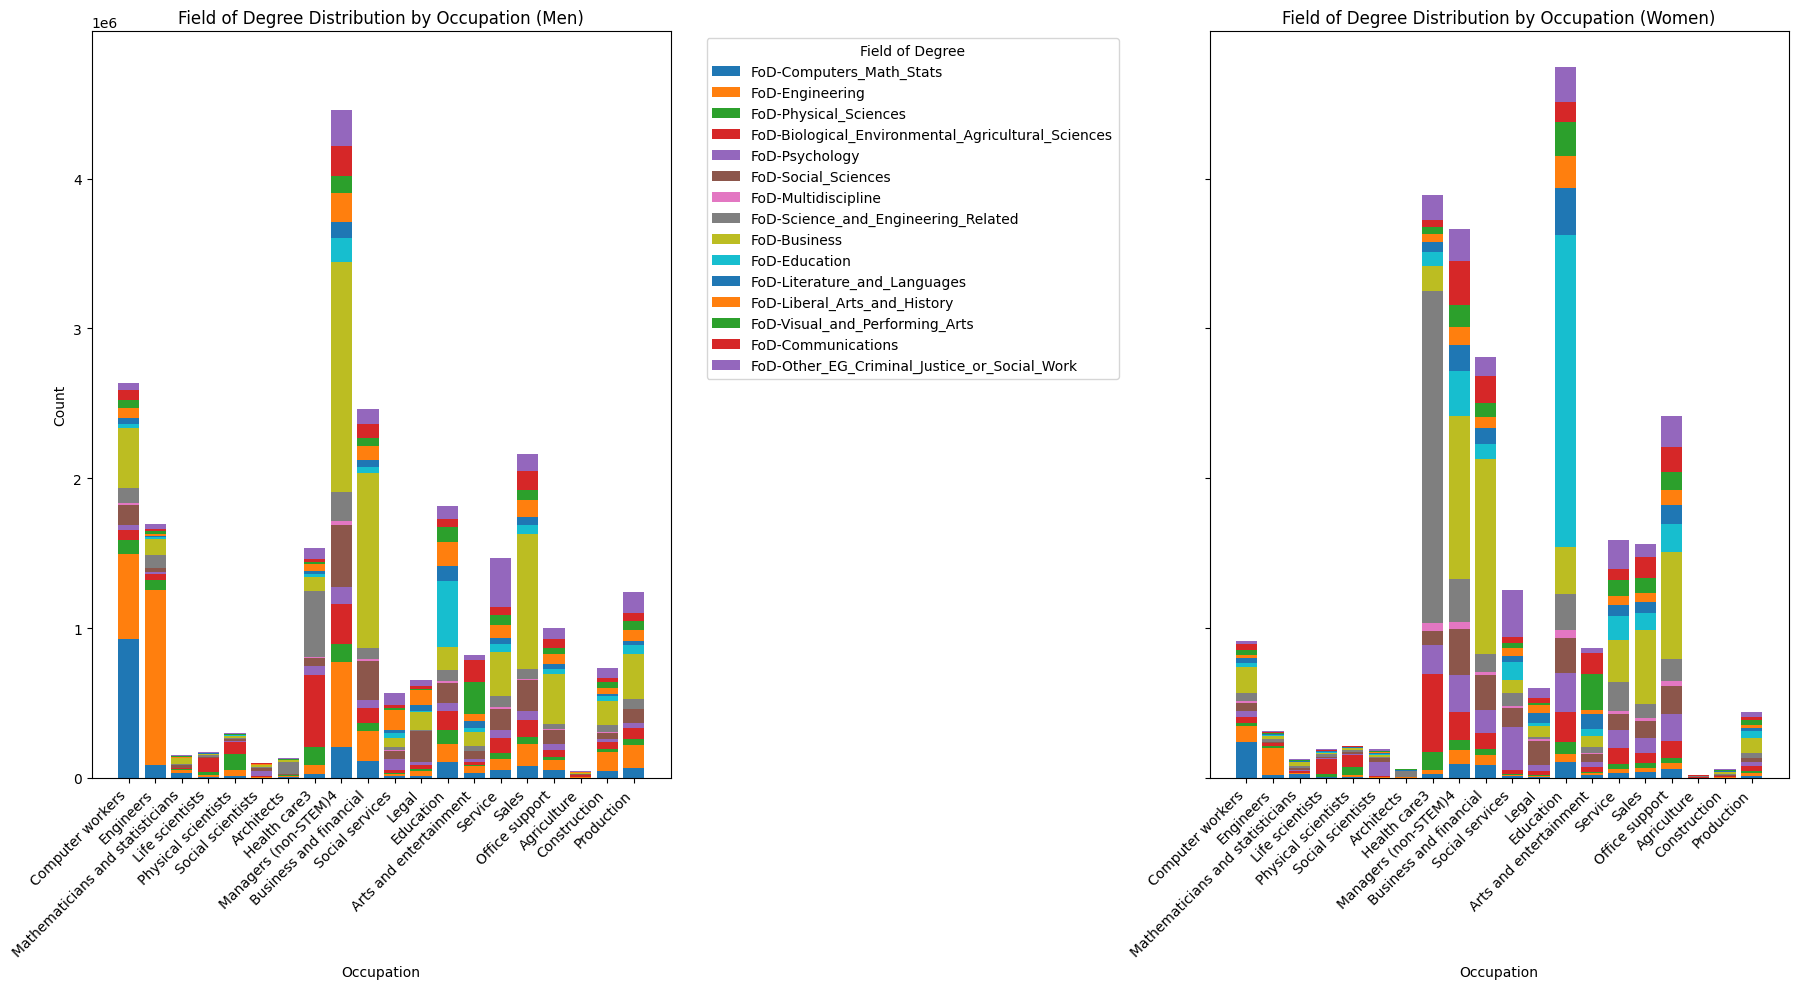

In [ ]:
# Define fields of degree columns
fields = df_men_all_ed_levels.columns[1:-1]  # Excluding 'Occupation' and 'Gender'

# Set up the figure with two subplots
fig, (ax_men, ax_women) = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# Plot for Men
bottom = None
for field in fields:
    ax_men.bar(
        df_men_all_ed_levels['Occupation'], df_men_all_ed_levels[field],
        label=field, bottom=bottom
    )
    bottom = df_men_all_ed_levels[fields[:list(fields).index(field)+1]].sum(axis=1)
ax_men.set_title("Field of Degree Distribution by Occupation (Men)")
ax_men.set_xlabel("Occupation")
ax_men.set_ylabel("Count")
ax_men.legend(title="Field of Degree", bbox_to_anchor=(1.05, 1), loc='upper left')
ax_men.set_xticks(range(len(df_men_all_ed_levels['Occupation'])))
ax_men.set_xticklabels(df_men_all_ed_levels['Occupation'], rotation=45, ha='right')

# Plot for Women
bottom = None
for field in fields:
    ax_women.bar(
        df_women_all_ed_levels['Occupation'], df_women_all_ed_levels[field],
        label=field, bottom=bottom
    )
    bottom = df_women_all_ed_levels[fields[:list(fields).index(field)+1]].sum(axis=1)
ax_women.set_title("Field of Degree Distribution by Occupation (Women)")
ax_women.set_xlabel("Occupation")
ax_women.set_xticks(range(len(df_women_all_ed_levels['Occupation'])))
ax_women.set_xticklabels(df_women_all_ed_levels['Occupation'], rotation=45, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Process the second xlsx file from the American Community Survey
- Recreate the steps used on the first file from the dataset

In [ ]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-bach-degree.xlsx'

# Specify only the required columns by their indices
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the starting row and the number of rows to read
start_row = 27
num_rows = 20  # Number of rows to read after the starting row

# Load the data with only the selected columns and limit the rows
df_men_bach_degree = pd.read_excel(file_path, skiprows=start_row, nrows=num_rows, usecols=selected_columns)

# Define descriptive column names for the selected columns
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the custom column names
df_men_bach_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_men_bach_degree['Occupation'] = df_men_bach_degree['Occupation'].str.lstrip(". ")

# Add a gender column
df_men_bach_degree['Gender'] = 'Male'

# Select numeric columns that need conversion to int64
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Convert selected numeric columns to int64
df_men_bach_degree[numeric_columns] = df_men_bach_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_men_bach_degree.head())
print(df_men_bach_degree.tail())
print(df_men_bach_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    625800   
1                         Engineers                     56800   
2  Mathematicians and statisticians                     15940   
3                   Life scientists                      2384   
4               Physical scientists                      3957   

   FoD-Engineering  FoD-Physical_Sciences  \
0           311200                  39510   
1           748300                  28969   
2             8100                   1527   
3             3942                   6336   
4            10910                  41110   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              39740            23780   
1                                              32610             5753   
2                                               3644             1507   
3                                             

In [ ]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-bach-degree.xlsx'

# Specify the selected columns by their indices (same as for men)
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the header row and the number of rows for women
header_row = 49
num_rows = 20  # The same as for men

# Load the data for women with the specified columns, skipping initial rows and using the right number of rows
df_women_bach_degree = pd.read_excel(
    file_path, skiprows=header_row, nrows=num_rows, usecols=selected_columns
)

# Define descriptive column names
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the column names
df_women_bach_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_women_bach_degree['Occupation'] = df_women_bach_degree['Occupation'].str.lstrip(". ")

# Add a gender column with "Female" as the value
df_women_bach_degree['Gender'] = 'Female'

# Convert numeric columns to int64 to ensure consistency with the men’s DataFrame
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]
df_women_bach_degree[numeric_columns] = df_women_bach_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_women_bach_degree.head())
print(df_women_bach_degree.tail())
print(df_women_bach_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    145800   
1                         Engineers                      9388   
2  Mathematicians and statisticians                     10250   
3                   Life scientists                       998   
4               Physical scientists                      1547   

   FoD-Engineering  FoD-Physical_Sciences  \
0            48869                  10060   
1           103499                   7161   
2             3298                    729   
3             2051                   5998   
4             2852                  23070   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              21549            21480   
1                                               8647             2684   
2                                               3034             4187   
3                                             

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

- https://it4063c.github.io/course-notes/working-with-data/data-sources for methods to import the various data types  
- https://www.kaggle.com/datasets/hackerrank/developer-survey-2018/data for the Kaggle dataset 
- https://www.pewresearch.org/social-trends/2018/01/09/women-and-men-in-stem-often-at-odds-over-workplace-equity/  for the link to the Pew Research Survey
- https://ncses.nsf.gov/pubs/nsb20212/participation-of-demographic-groups-in-stem for the html scraped dataset
- https://www.census.gov/library/stories/2021/06/does-majoring-in-stem-lead-to-stem-job-after-graduation.html for the links to the American Community Survey 2019
- IT4075 Applied Machine Learning zyBooks for data classification logic and code
- https://medium.com/@acceldia/python-101-reading-excel-and-spss-files-with-pandas-eed6d0441c0b to learn how to work with .sav files
- https://python-docx.readthedocs.io/en/latest/user/documents.html to learn how to work with .docx files inside Python

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 46274 bytes to source.py
